#### Importing Necessary Libraries

In [49]:
import pandas as pd
import os
import matplotlib.pyplot as plt

#### Making it unique and merging into a single csv file

In [50]:
files = [file for file in os.listdir('./files')]
all_data = pd.DataFrame()

for file in files:
    with open("files/"+file, 'r') as temp_f:
        # get No of columns in each line
        col_count = [ len(l.split(",")) for l in temp_f.readlines() ]

        ### Generate column names  (names will be 0, 1, 2, ..., maximum columns - 1)
        column_names = [i for i in range(0, max(col_count))]

        ### Read csv
        df = pd.read_csv("files/"+file, delimiter=",", names=column_names)


        # Making the first row as head
        new_header = df.iloc[0]
        df = df[1:]
        df.columns = new_header

        df = df[df['Status'] != 'Awaiting Targets']

        # Making the dataset distinct with respect to Signal_date
        df = df.drop_duplicates(subset = ["Signal_Date"])

        #Concating it to the new dataframe
        all_data = pd.concat([all_data,df])
    
all_data.to_csv("all_data_final.csv",index=False)
all_data

0         Date Close_Price Signal_Date     Call Stop_Loss Target_1 Target_2  \
1   2021-01-01       388.1  2020-12-30    384.7    389.77   381.57   379.04   
3   2021-01-15      438.55  2021-01-14   450.59    466.14   440.97    433.2   
5   2021-01-20       947.7  2021-01-19   942.55    956.47   933.93   926.97   
7   2021-01-25      437.25  2021-01-21   448.29    440.09   454.72   459.24   
9   2021-01-28       431.9  2021-01-27   444.11    448.43   441.44   439.28   
..         ...         ...         ...      ...       ...      ...      ...   
9   2021-02-02       110.8  2021-02-01   107.27    104.49   109.44   110.97   
1   2021-01-01     1480.35  2020-12-30  1426.23   1449.27  1411.98  1400.45   
3   2021-01-07     1496.85  2021-01-06  1425.34   1440.63  1415.88  1408.23   
5   2021-01-11     1507.85  2021-01-08  1524.37   1495.88  1546.74  1562.46   
9   2021-01-20     1596.25  2021-01-18  1607.24   1651.15  1580.07  1558.12   

0  Target_3 Target_4                 Status   NaN  
1     376.5    372.9       Target 1 Reached   NaN  
3    425.43   414.36       Target 1 Reached  SELL  
5    920.01    910.1       Target 1 Reached  SELL  
7    464.37   469.35  Stop Loss has occured   BUY  
9    437.12   434.05   Final Target Reached  SELL  
..      ...      ...                    ...   ...  
9    112.71    114.4       Target 3 Reached   BUY  
1   1388.93  1372.53  Stop Loss has occured   NaN  
3   1400.58   1389.7  Stop Loss has occured   NaN  
5    1580.3  1597.61  Stop Loss has occured   BUY  
9   1536.16   1504.9       Target 1 Reached  SELL  

[188 rows x 11 columns]

In [99]:
data_unique = pd.read_csv("all_data_final.csv")
data_unique = data_unique.drop(data_unique.columns[-1],axis=1)
data_unique.head()

Date  Close_Price Signal_Date    Call  Stop_Loss  Target_1  Target_2  \
0  2021-01-01       388.10  2020-12-30  384.70     389.77    381.57    379.04   
1  2021-01-15       438.55  2021-01-14  450.59     466.14    440.97    433.20   
2  2021-01-20       947.70  2021-01-19  942.55     956.47    933.93    926.97   
3  2021-01-25       437.25  2021-01-21  448.29     440.09    454.72    459.24   
4  2021-01-28       431.90  2021-01-27  444.11     448.43    441.44    439.28   

   Target_3  Target_4                 Status  
0    376.50    372.90       Target 1 Reached  
1    425.43    414.36       Target 1 Reached  
2    920.01    910.10       Target 1 Reached  
3    464.37    469.35  Stop Loss has occured  
4    437.12    434.05   Final Target Reached

#### Cleaning up data

In [52]:
nan_df = data_unique[data_unique.isna().any(axis=1)]

# Dropping NaN rows
data_unique = data_unique.dropna(how='any')
data_unique.head()

Date  Close_Price Signal_Date    Call  Stop_Loss  Target_1  Target_2  \
0  2021-01-01       388.10  2020-12-30  384.70     389.77    381.57    379.04   
1  2021-01-15       438.55  2021-01-14  450.59     466.14    440.97    433.20   
2  2021-01-20       947.70  2021-01-19  942.55     956.47    933.93    926.97   
3  2021-01-25       437.25  2021-01-21  448.29     440.09    454.72    459.24   
4  2021-01-28       431.90  2021-01-27  444.11     448.43    441.44    439.28   

   Target_3  Target_4                 Status  
0    376.50    372.90       Target 1 Reached  
1    425.43    414.36       Target 1 Reached  
2    920.01    910.10       Target 1 Reached  
3    464.37    469.35  Stop Loss has occured  
4    437.12    434.05   Final Target Reached

#### Count of total calls generated

In [53]:
total_calls = data_unique['Signal_Date'].count()

#### Error in calls

In [54]:
grouped = data_unique.groupby('Status').groups

# Converting grouped data into list
error_calls = len(list(grouped['Stop Loss has occured']))

#### Correct calls count

In [55]:
correct_calls = total_calls - error_calls

#### Accuracy of the alogrothm

In [56]:
correct_calls / total_calls

0.7712765957446809

([<matplotlib.patches.Wedge at 0x7f2f64df3f10>,
 [Text(-0.8280329694194546, 0.7241280284275708, 'Targets'),
  Text(0.8280329694194545, -0.7241280284275708, 'Stop Loss')])

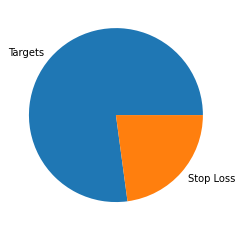

In [103]:
val = [correct_calls,error_calls]
lab = ['Targets','Stop Loss']
plt.pie(val,labels=lab)

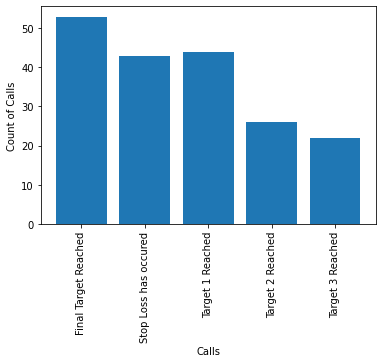

In [98]:
temp = data_unique.groupby('Status')
calls = temp.size()

status = [foo for foo, df in temp]
plt.bar(status,calls)
plt.xticks(status,rotation='vertical')
plt.ylabel('Count of Calls')
plt.xlabel('Calls')
plt.show()